In [120]:
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import numpy as np
import datetime as dt
from pathlib import Path
import os
import csv
import hvplot.pandas
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
load_dotenv()

True

In [3]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")
#print(alpaca_api_key)

In [31]:
csv_path = Path("../Yolanda_Baker_Notebook/ticker_revenue.csv")
revenue_data = pd.read_csv(csv_path)
Revenue = pd.DataFrame(revenue_data.tail(9))

In [126]:
Revenue_Data = Revenue.set_index("Ticker")
Revenue_Data.sort_index(ascending=True, inplace=True)
Revenue_Data

,Date,Revenue
Ticker,,
GRUB,2018,1007.2
GRUB,2019,1312.1
GRUB,2020,1819.9
MCD,2018,21257.9
MCD,2019,21364.4
MCD,2020,19207.8
YUM,2018,5688.0
YUM,2019,5597.0
YUM,2020,5652.0


In [168]:
#Revenue_Data.plot.bar()

In [129]:
eps_2018 = {"EPS_2018": [4.69, .85, 7.54]}
eps_2019 = {"EPS_2019": [4.14, -.20, 7.88]}
eps_2020 = {"EPS_2020": [2.94, -1.69, 6.31]}
tickers = ["YUM", "GRUB", "MCD"]

In [162]:
EPS_2018 = pd.DataFrame(eps_2018, index = tickers)
EPS_2018

,EPS_2018
YUM,4.69
GRUB,0.85
MCD,7.54


In [163]:
EPS_2019 = pd.DataFrame(eps_2019, index = tickers)
EPS_2019

,EPS_2019
YUM,4.14
GRUB,-0.20
MCD,7.88


In [164]:
EPS_2020 = pd.DataFrame(eps_2020, index = tickers)
EPS_2020

,EPS_2020
YUM,2.94
GRUB,-1.69
MCD,6.31


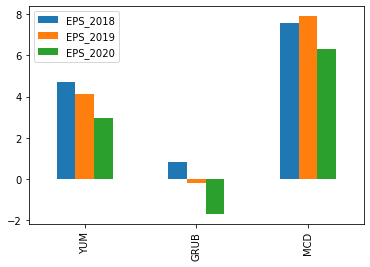

In [167]:
joined_eps = pd.concat([EPS_2018, EPS_2019, EPS_2020], axis = "columns", join = "inner")
joined_eps.plot.bar()

In [153]:
timeframe = "1D"
# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2018-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-12-31", tz="America/New_York").isoformat()

# Set the ticker information
ticker = ["YUM","GRUB","MCD","SPY"]

# Get 3 year's worth of historical price data for Microsoft and Coca-Cola
covid_ticker = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
covid_ticker.head()

GRUB                                     MCD  \
                            open   high      low  close   volume    open   
2018-01-02 00:00:00-05:00  71.54  72.01  70.2600  71.27  1255728  173.73   
2018-01-03 00:00:00-05:00  71.45  71.78  70.9100  71.31   714615  173.23   
2018-01-04 00:00:00-05:00  71.93  72.60  70.9900  71.87   843995  173.24   
2018-01-05 00:00:00-05:00  72.43  73.02  71.3796  72.96  1126306  174.00   
2018-01-08 00:00:00-05:00  71.50  72.10  70.8200  71.33   959352  173.74   

                                                                 SPY          \
                               high     low   close   volume    open    high   
2018-01-02 00:00:00-05:00  174.4799  172.66  173.22  2344135  267.84  268.81   
2018-01-03 00:00:00-05:00  173.6400  172.00  172.49  2706678  268.95  270.64   
2018-01-04 00:00:00-05:00  174.1300  172.73  173.75  1860820  271.21  272.16   
2018-01-05 00:00:00-05:00  175.0000  173.40  174.04  2031490  272.50  273.56   
2018-01-08 00:00:00-05:00  174.2100  172.93  173.92  1401313  273.31  274.10   

                                                       YUM                \
                              low   close    volume   open   high    low   
2018-01-02 00:00:00-05:00  267.40  268.80  50844678  82.15  82.46  81.48   
2018-01-03 00:00:00-05:00  268.95  270.47  53141377  81.23  81.82  81.17   
2018-01-04 00:00:00-05:00  271.10  271.63  47841096  81.75  82.59  81.53   
2018-01-05 00:00:00-05:00  271.95  273.39  45782622  82.59  83.01  82.36   
2018-01-08 00:00:00-05:00  272.98  273.93  33627800  82.72  83.06  82.12   

                                             
                           close     volume  
2018-01-02 00:00:00-05:00  81.61  1089380.0  
2018-01-03 00:00:00-05:00  81.53  1923085.0  
2018-01-04 00:00:00-05:00  82.35  1585861.0  
2018-01-05 00:00:00-05:00  82.84  1542610.0  
2018-01-08 00:00:00-05:00  82.96  1309538.0

In [154]:
covid_df = pd.DataFrame()
covid_df["YUM"] = covid_ticker["YUM"]["close"]
covid_df["GRUB"] = covid_ticker["GRUB"]["close"]
covid_df["MCD"] = covid_ticker["MCD"]["close"]
covid_df["SPY"] = covid_ticker["SPY"]["close"]
covid_df.index = covid_df.index.date
covid_returns = covid_df.pct_change().dropna()
covid_returns.head(10)

,YUM,GRUB,MCD,SPY
2018-01-03,-0.000980,0.000561,-0.004214,0.006213
2018-01-04,0.010058,0.007853,0.007305,0.004289
2018-01-05,0.005950,0.015166,0.001669,0.006479
2018-01-08,0.001449,-0.022341,-0.000689,0.001975
2018-01-09,-0.002290,-0.030282,-0.002242,0.002190
2018-01-10,-0.002658,-0.038311,-0.000058,-0.001566
2018-01-11,-0.000848,0.025556,-0.000864,0.007224
2018-01-12,0.014064,0.035327,0.001038,0.006629
2018-01-16,-0.008608,-0.010760,0.000691,-0.003418
2018-01-17,0.001930,0.013310,0.007428,0.009568


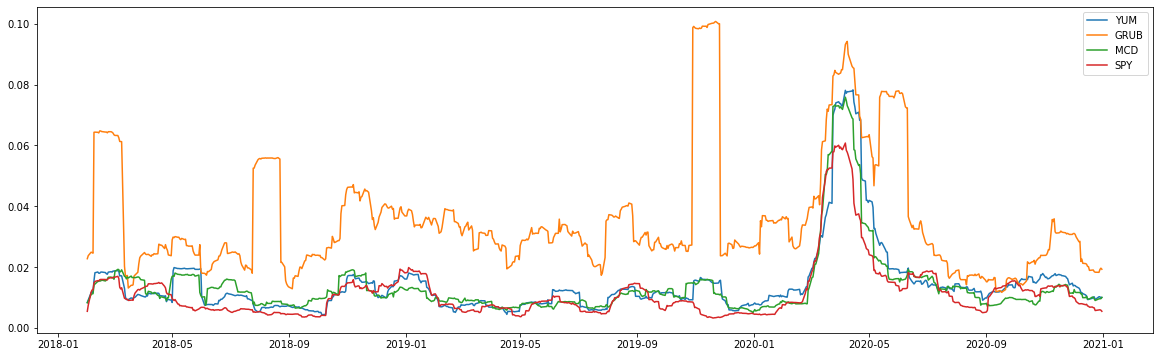

In [155]:
standard_deviation = covid_returns.rolling(window=21).std()
standard_deviation.plot(figsize=(20,6))

In [143]:
timeframe = "1D"
# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2018-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-12-31", tz="America/New_York").isoformat()

# Set the ticker information
spticker = ["SPY"]

# Get 3 year's worth of historical price data for Microsoft and Coca-Cola
SP_ticker = alpaca.get_barset(
    spticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
SP_ticker.head()

SPY                                  
                             open    high     low   close    volume
2018-01-02 00:00:00-05:00  267.84  268.81  267.40  268.80  50844678
2018-01-03 00:00:00-05:00  268.95  270.64  268.95  270.47  53141377
2018-01-04 00:00:00-05:00  271.21  272.16  271.10  271.63  47841096
2018-01-05 00:00:00-05:00  272.50  273.56  271.95  273.39  45782622
2018-01-08 00:00:00-05:00  273.31  274.10  272.98  273.93  33627800

In [144]:
sp_df = pd.DataFrame()
sp_df["SPY"] = SP_ticker["SPY"]["close"]
sp_df.index = sp_df.index.date
sp_returns = sp_df.pct_change().dropna()
sp_returns.head(10)

,SPY
2018-01-03,0.006213
2018-01-04,0.004289
2018-01-05,0.006479
2018-01-08,0.001975
2018-01-09,0.002190
2018-01-10,-0.001566
2018-01-11,0.007224
2018-01-12,0.006629
2018-01-16,-0.003418
2018-01-17,0.009568


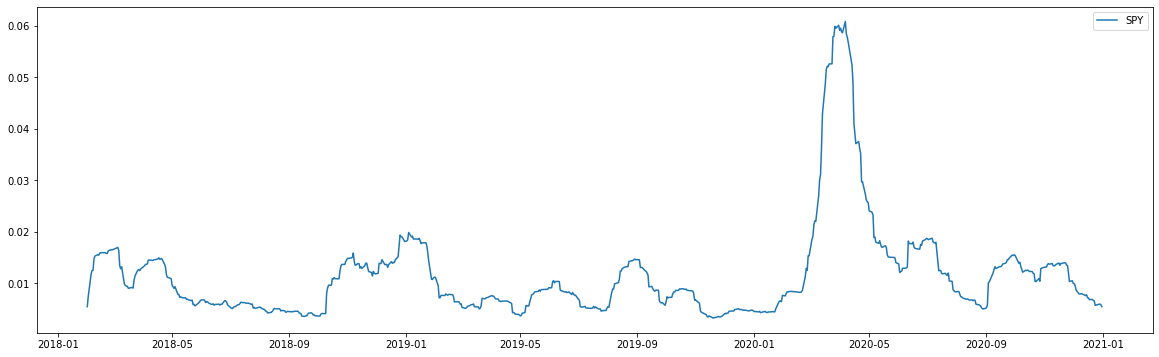

In [149]:
spstandard_deviation = sp_returns.rolling(window=21).std()
spstandard_deviation.plot(figsize=(20,6))